In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os.path
from scipy import interpolate
PI=math.pi
import random

In [2]:
### Некоторые неменяющиеся величины для сцинтиллятора в основании
photon=np.arange(234).reshape(26,9)
errph=np.arange(234).reshape(26,9)
angle=np.array([101.,201.,301.,401.,451.,501.,601.,701.,801.])
angle1=np.array([10.,20.,30.,40.,45.,50.,60.,70.,80.])
distance=np.array([float(i) for i in range (50,-2,-2)])
r_min=np.array([float(i-1) for i in range (2,54,2)])
for i in range (24,-1,-1): r_min[i+1]=r_min[i]
r_min[0]=0
r_max=np.array([float(math.fabs(i-1)) for i in range(0,52,2)])
for i in range (25): r_max[i]=r_max[i+1]
r_max[25]=50

### Некоторые неменяющиеся величины для сцинтиллятора на поверхности конуса
photon1=np.arange(198).reshape(22,9)
errph1=np.arange(198).reshape(22,9)
distance1=np.array([float(i) for i in range (50,6,-2)])
r_min1=np.array([float(i-1) for i in range (8,52,2)])
r_max1=np.array([float(math.fabs(i-1)) for i in range(8,52,2)])
for i in range (21): r_max1[i]=r_max1[i+1]
r_max1[21]=50

print(r_min)



### Функция коэффициента детерминации
def determination(x,y,z):
    sigmsq=1/len(y)*sum((y[:]-z[0]*(x[:])**2 - z[1]*(x[:]) - z[2])**2)
    middle=1/len(y)*sum(y)
    sigmsqy=1/len(y)*sum((y-middle)**2)
    hisqr=(1-sigmsq/sigmsqy)
    hisqrcorrected=(1-(1-hisqr)*(len(y)-1)/(len(y)-3))
    if (hisqr<0) : print('Качество приближения - выколите мне глаза 1 - %f' %(hisqr))
    elif (hisqrcorrected<0): print('Качество приближения - выколите мне глаза 2 - %f' %(hisqrcorrected))
    elif ((hisqrcorrected < hisqr) & (hisqrcorrected>0.8)): print('Качество приближения очень хорошее - %f' %(hisqrcorrected))   
    elif ((hisqrcorrected < hisqr) & (hisqrcorrected<0.8)): print('Качество приближения приемлимое - %f' %(hisqrcorrected))   
    else: print('Что не так-то')

[ 0.  1.  3.  5.  7.  9. 11. 13. 15. 17. 19. 21. 23. 25. 27. 29. 31. 33.
 35. 37. 39. 41. 43. 45. 47. 49.]


-------------------------------------------------------------------
Качество приближения очень хорошее - 0.936597
Функция аппроксимирующей кривой y=0.014896x^2+-1.097962x+21.456550
Иттегральный коэффициент светосбора 9.392349 +/- 0.090070
Среднее число собранных фотонов 939.234880 +/- 9.006960 
Значение критерия 1 - 0.910793  +/- 0.002134 
Значение критерия 2 - 0.068488  +/- 0.000080 
-------------------------------------------------------------------
-------------------------------------------------------------------
Качество приближения очень хорошее - 0.937028
Функция аппроксимирующей кривой y=0.007347x^2+-0.543257x+10.770361
Иттегральный коэффициент светосбора 4.781624 +/- 0.064414
Среднее число собранных фотонов 478.162400 +/- 6.441400 
Значение критерия 1 - 0.912170  +/- 0.002900 
Значение критерия 2 - 0.033887  +/- 0.000010 
-------------------------------------------------------------------
-------------------------------------------------------------------
Качество приближения

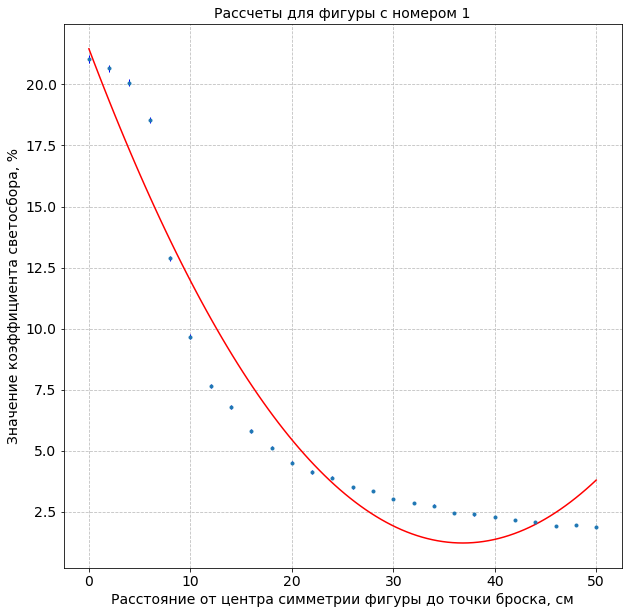

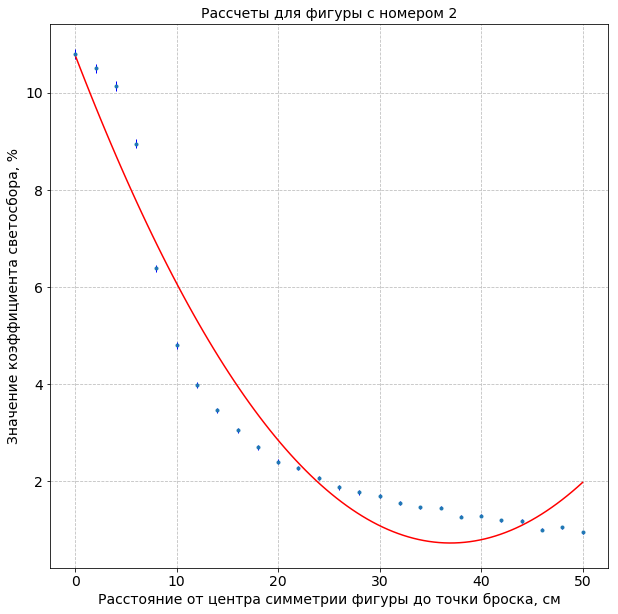

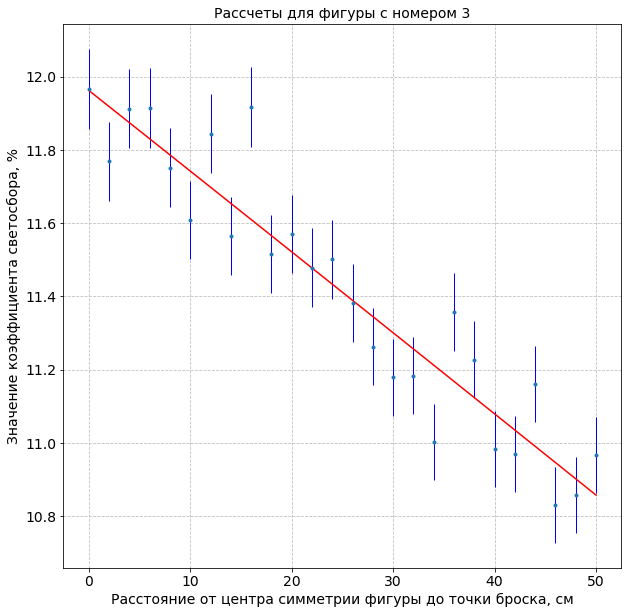

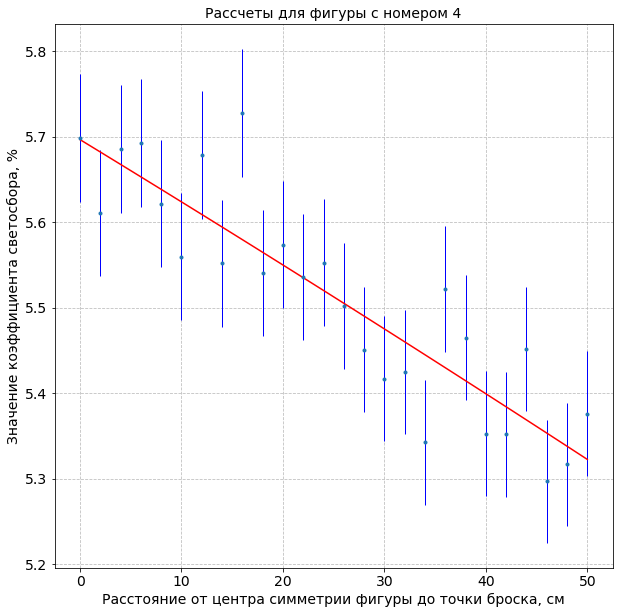

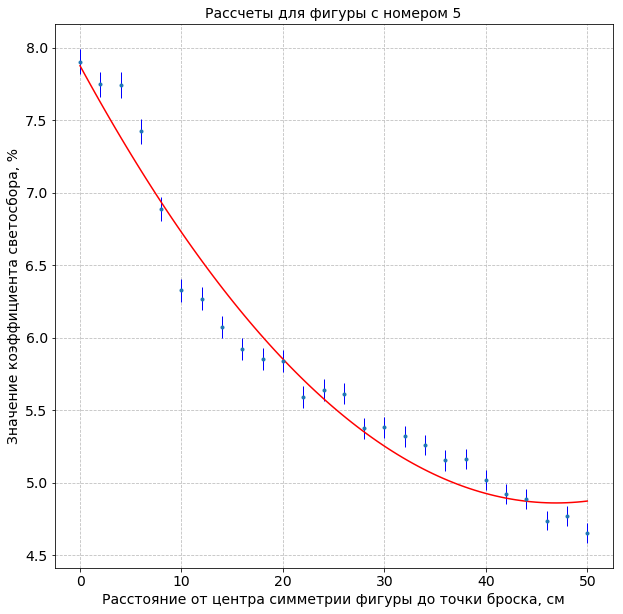

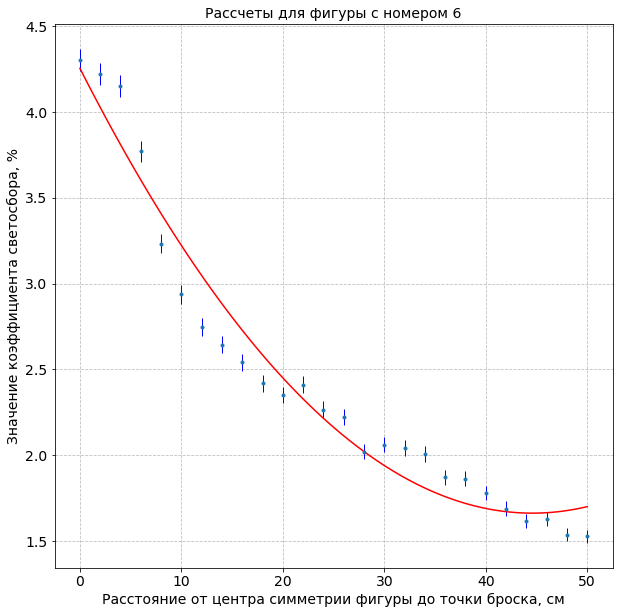

In [4]:
### Некоторые неменяющиеся величины для сцинтиллятора в основании
photon=np.arange(156).reshape(26,6)
errph=np.arange(156).reshape(26,6)
distance=np.array([float(i) for i in range (50,-2,-2)])
r_min=np.array([float(i-1) for i in range (2,54,2)])
for i in range (24,-1,-1): r_min[i+1]=r_min[i]
r_min[0]=0
r_max=np.array([float(math.fabs(i-1)) for i in range(0,52,2)])
for i in range (25): r_max[i]=r_max[i+1]
r_max[25]=50
## Чтение данных. Запущено в каждой точке по 1000000 фотонов
for i in range(6):           
    file_name=r"D:\figures\cylinder\%d.txt"%(i+1)
    file=open(file_name, 'r')
    for j in range (26):    
        line=file.readline()
        t=int(line)
        photon[j][i]=t
        
### Массив из значений ошибок для каждой точки бросания        
errph[:,:]=photon[:,:]**(1/2)

### Рассчет интегрального коэффициента светосбора с погрешностью для каждой фигуры
### Рассчет среднего числа собранных фотонов с погрешностью для каждой фигуры
light=np.array([ float(sum((r_max[:]**2-r_min[:]**2)*PI*photon[:,i]/1000)/(PI*r_max[25]**2) ) for i in range (6)])
lighterr=np.array([ float(sum((r_max[:]**2-r_min[:]**2)*PI*errph[:,i]/1000)/(PI*r_max[25]**2) ) for i in range (6)])
midpho=np.array([ float(light[i]*100) for i in range (6)])
midphoerr=np.array([ float(lighterr[i]*100) for i in range (6)])
### Рассчет знчения критерия 1 (ищется относительное значение разброса между максимально собранным числом фотонов
### и минимальным значением) c погрешностью
kr1=np.array([ float((photon[:,i].max()-photon[:,i].min())/photon[:,i].max()) for i in range (6)])
kr1err=np.array([float((1-kr1[i])*((errph[:,i].max()/photon[:,i].max())**2+
                                   (errph[:,i].min()/photon[:,i].min())**2)**(1/2)) for i in range (6)])

### Рассчет критерия 2 (оценка дисперсии для каждонго угла)  с погрешностью
kr2=np.array([ float((sum((light[i]/100-photon[:,i]/100000)**2*PI*
                          (r_max[:]**2-r_min[:]**2))/(PI*r_max[25]**2))**(1/2)) for i in range (6)])
kr2err=np.array([float(sum(2*((light[i]/100-photon[:,i]/100000)**2*
                               (lighterr[i]/100)**2 + (light[i]-photon[:,i]/100000)**2*(errph[:,i]/100000)**2)*PI*
                            (r_max[:]**2-r_min[:]**2))/(PI*r_max[25]**2))*(1/2) for i in range (6)])   
### Построение графиков зависимости зарегистрированных фотонов от расстояния до оси симметрии
for i in range (6):
    plt.figure(i, figsize=(10, 10))
    plt.subplot(1,1,1)
    plt.grid(True, linestyle='--', color='0.75')
    plt.xlabel('Расстояние от центра симметрии фигуры до точки броска, см', size = '14')
    plt.ylabel('Значение коэффициента светосбора, %', size = '14')
    plt.title('Рассчеты для фигуры с номером %d' %(i+1), size = '14')
    hk=photon[:,i]/1000
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    print('-------------------------------------------------------------------')
    
    ### Рассчет коэффициента детерминации - оценки качества приближения
    z=np.polyfit(distance,hk,2)
    determination(distance,hk,z)
    
    ### Вывод остального нужного   
    print('Функция аппроксимирующей кривой y=%fx^2+%fx+%f' %(z[0], z[1], z[2]))
    print('Иттегральный коэффициент светосбора %f +/- %f' %(light[i], lighterr[i]))
    print('Среднее число собранных фотонов %f +/- %f ' %(midpho[i], midphoerr[i]))
    print('Значение критерия 1 - %f  +/- %f ' %(kr1[i], kr1err[i]))
    print('Значение критерия 2 - %f  +/- %f ' %(kr2[i], kr2err[i]))
    print('-------------------------------------------------------------------')
    dis1=np.linspace(0,50,num=100)
    plt.plot(dis1, z[0]*(dis1)**2+ z[1]*(dis1)+z[2], 'r', label='Fitted line')
    plt.errorbar(distance, hk, yerr=errph[:,i]/1000,fmt='.', ecolor='b', linewidth=1, label='Dots with errors')
    plt.savefig('D:/figures/cylinder/фигура%d.png' %(i))